In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('pt_core_news_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Convertendo os arquivos pra csv
# olidtrain_df = pd.read_parquet('./data/olidtrain.parquet')
# olidtrain_df.to_csv('./data/olidtrain.csv', index=False)

# olidtest_df = pd.read_parquet('./data/olidtest.parquet')
# olidtest_df.to_csv('./data/olidtest.csv', index=False)

In [23]:
# Dataset
test = pd.read_csv('./data/olidtest.csv')
train = pd.read_csv('./data/olidtrain.csv')
# Juntando os dois datasets
df = pd.concat([train, test])

In [25]:
df

,id,text,is_offensive,is_targeted,targeted_type,toxic_spans,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,religious_intolerance,sexism,xenophobia
0,c779826dc43f460cb18e8429ca443477,"Pior do que adolescentezinhas de merda...são pessoas que levam filmes tão a sério! O livro/filme é dela, ela faz o que quiser! E por mais ruim que seja, ta rendendo milhões (:",OFF,UNT,NaN,[ 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23\n 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38],False,False,True,False,False,False,True,False,False,True,False
1,a3d7839456ae4258a70298fcf637952e,"Podia ter beijo também, pra ver se o homofóbicos cortar os pulsos",OFF,UNT,NaN,[24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47\n 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64],False,False,True,False,False,False,False,False,False,False,False
2,b830374760cc44789f1493c6b228ebc1,"o monark não é racista que filha da putagem, já sofreram mano, o flow vai cair e já era, bah que foda isso tudo...",OFF,TIN,GRP,[36 37 38 39 40 41 42],False,False,True,False,False,False,False,False,False,False,False
3,73299805588d424fa2905eaf9e616cf1,fudeu minha mãe acabou de chegar em casa e eu acabei de acordar tomei no cu,OFF,TIN,OTH,[ 0 1 2 3 4 5 72 73 74],False,False,True,False,False,False,True,False,False,False,False
4,862cf8f819814e47bb4e7f6b4b0afc73,"Vergonha,ainda segura a bandeira de um país de verdade ,não esse puteiro que tá tendo aqui. USER tá preocupado mais com a fama do que com o Brasil, nunca mais verá meu apoio",OFF,UNT,NaN,[58 59 60 61 62 63 64 65 66 67 68 69 70 71 72],False,True,True,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,c4eb91336485416b83d3d9de5585c74d,Essa thayse é falsa credo 😂 😂 😂 😂 😂,OFF,TIN,IND,[14 15 16 17 18],False,False,True,False,False,False,False,False,False,False,False
1734,f9e864f275d14bed9cd9e2ae8aed259d,Cara que tirar de contexto USER USER falou uma coisa não tem nada de tirar de contexto não isso não é discussão isso é abominável cara o q mais acho chato é q USER vem falando das pessoas te criticando se USER mesmo provocou isso mano ....,NOT,UNT,NaN,[],False,False,False,False,False,False,False,False,False,False,False
1735,574c84477a0243eba5814c4eef41aad3,USER Fala que era da era Obama!!!!! Jornalismo canalha!!!!!,OFF,TIN,OTH,[48 49 50 51 52 53 54],False,False,True,False,False,False,False,False,False,False,False
1736,682e423fda2542e9a914bcf58cb44477,"Existe pessoas que tem fetiche por pessoas ""sujas e fedidas "" pesquisem pra ver . USER",NOT,UNT,NaN,[],False,False,False,False,False,False,False,False,False,False,False


In [26]:
# Drop de colunas desnecessárias
df.drop(columns=['id', 'is_offensive', 'is_targeted', 'targeted_type', 'toxic_spans'], inplace=True)

In [27]:
# Remoção de usernames
df['text'] = df['text'].str.replace(r'@\w+|USER', '', regex=True)
# Remoção de links
df['text'] = df['text'].str.replace(r'http\S+', '', regex=True)
# Remoção de 'rt' ou 'RT'
df['text'] = df['text'].str.replace(r'\brt\b|\bRT\b', '', regex=True)
# Remoção de hashtags
df['text'] = df['text'].str.replace(r'#\w+', '', regex=True)
# Remoção de quebra de linha
df['text'] = df['text'].str.replace(r'\n', '', regex=True)
# Remoção de palavras contendo dígitos
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', regex=True)
# Remoção de palavras de tamanho 1 e 2
df['text'] = df['text'].str.replace(r'\b\w{1,2}\b', '', regex=True)
# Remoção de pontuações e caracteres especiais
df['text'] = df['text'].str.replace(r'[^\w\s]', ' ', regex=True)
# Remoção de espaços extras
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)

In [32]:
# Normalização de texto
df['text'] = df['text'].str.lower()

In [34]:
# Remoção de stop words
stop_words = set(stopwords.words('portuguese'))
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [36]:
# Tokenização
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))

In [38]:
# Lematização
df['tokenized_text'] = df['tokenized_text'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])

In [43]:
df.head(5)

,text,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,religious_intolerance,sexism,xenophobia,tokenized_text
0,pior adolescentezinhas merda pessoas levam filmes tão sério livro filme faz quiser ruim rendendo milhões,False,False,True,False,False,False,True,False,False,True,False,"[mau, adolescentezinha, merdo, pessoa, levar, filme, tão, sério, livro, filme, fazer, quiser, ruim, render, milhão]"
1,podia ter beijo pra ver homofóbicos cortar pulsos,False,False,True,False,False,False,False,False,False,False,False,"[poder, ter, beijo, pra, ver, homofóbico, cortar, pulso]"
2,monark racista filha putagem sofreram mano flow vai cair bah foda tudo,False,False,True,False,False,False,False,False,False,False,False,"[Monark, racista, filha, putagem, sofrer, mano, flow, ir, cair, bah, foda, tudo]"
3,fudeu mãe acabou chegar casa acabei acordar tomei,False,False,True,False,False,False,True,False,False,False,False,"[fuder, mãe, acabar, chegar, casa, acabar, acordar, tomei]"
4,vergonha ainda segura bandeira país verdade puteiro tendo aqui preocupado fama brasil nunca verá apoio,False,True,True,True,False,False,False,False,False,False,True,"[vergonha, ainda, seguro, bandeira, país, verdade, puteiro, ter, aqui, preocupar, fama, Brasil, nunca, ver, apoio]"


<Axes: >

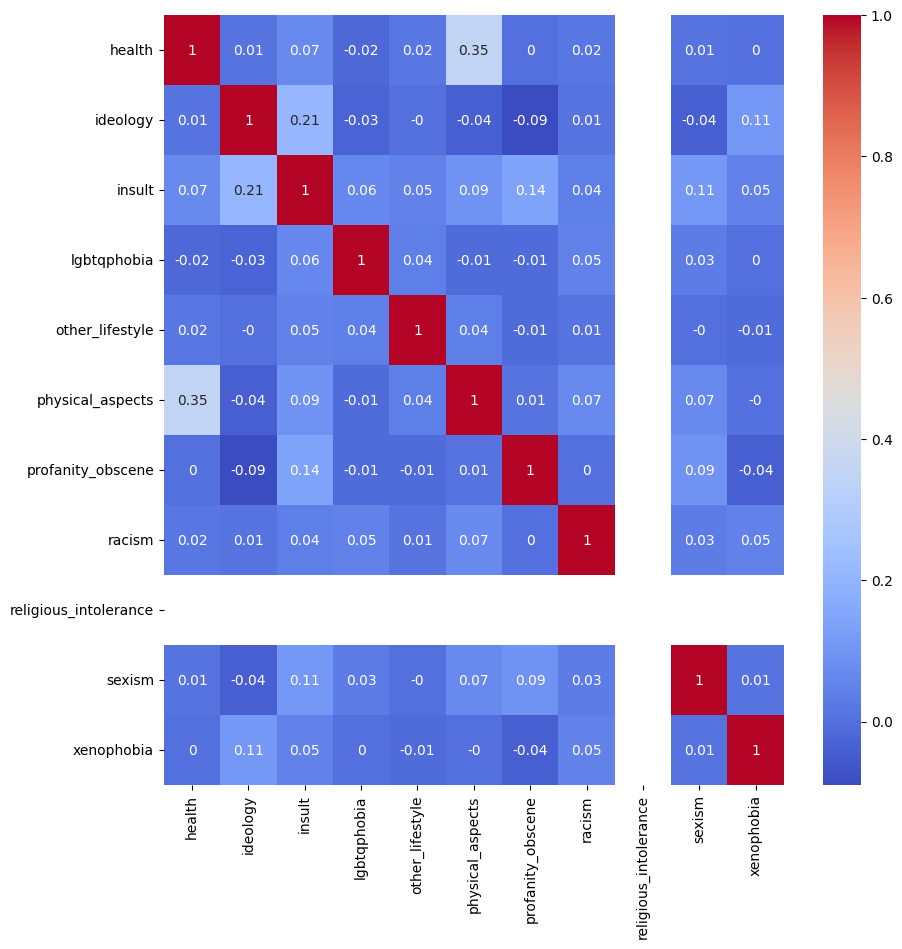

In [45]:
# Matriz correlação entre as classes
colunas = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle', 'physical_aspects', 'profanity_obscene', 'racism', 'religious_intolerance', 'sexism', 'xenophobia']
corr = df[colunas].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [49]:
# Value counts em religiou_intolerance
df['religious_intolerance'].value_counts()

religious_intolerance
False    6952
Name: count, dtype: int64

In [50]:
processed_df = df[['tokenized_text', 'health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle', 'physical_aspects', 'profanity_obscene', 'racism', 'sexism', 'xenophobia']]

In [51]:
processed_df

,tokenized_text,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,sexism,xenophobia
0,"[mau, adolescentezinha, merdo, pessoa, levar, filme, tão, sério, livro, filme, fazer, quiser, ruim, render, milhão]",False,False,True,False,False,False,True,False,True,False
1,"[poder, ter, beijo, pra, ver, homofóbico, cortar, pulso]",False,False,True,False,False,False,False,False,False,False
2,"[Monark, racista, filha, putagem, sofrer, mano, flow, ir, cair, bah, foda, tudo]",False,False,True,False,False,False,False,False,False,False
3,"[fuder, mãe, acabar, chegar, casa, acabar, acordar, tomei]",False,False,True,False,False,False,True,False,False,False
4,"[vergonha, ainda, seguro, bandeira, país, verdade, puteiro, ter, aqui, preocupar, fama, Brasil, nunca, ver, apoio]",False,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1733,"[thayse, falso, credo]",False,False,True,False,False,False,False,False,False,False
1734,"[carar, tirar, contexto, falar, coisa, nada, tirar, contexto, discussão, abominável, cara, achar, chato, vir, falar, pessoa, criticar, provocar, mano]",False,False,False,False,False,False,False,False,False,False
1735,"[falar, obama, jornalismo, canalhar]",False,False,True,False,False,False,False,False,False,False
1736,"[existir, pessoa, feticher, pessoa, sujo, fedido, pesquisem, pra, ver]",False,False,False,False,False,False,False,False,False,False


In [52]:
# Salvar o dataset processado
processed_df.to_csv('./data/processed_olid.csv', index=False)